<a href="https://colab.research.google.com/github/ujwalnk/AutoGlow/blob/main/machine_learning_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn

Pandas is most likeley used when missing data / fixing data

In [ ]:
df = pd.read_csv('merge.csv')
df.head()

,Rain,Aayana,Maasa,Paksha,Tithi,Nakshatra,Yoga,Karna
0,0,1,2,1,2,3,5,2
1,0,1,2,1,2,3,5,2
2,0,1,2,1,2,3,5,2
3,0,1,2,1,2,3,5,2
4,0,1,2,1,2,3,5,2


Testing for missing data: Will return a 0 in that row
- Drop that row incase there is enough data
- Else you will use mean / mode / median to get proper data for rows
- Or assume / use stats

In [ ]:
df.isnull().sum()

Rain         0
Aayana       0
Maasa        0
Paksha       0
Tithi        0
Nakshatra    0
Yoga         0
Karna        0
dtype: int64

The data must not be biased, must be balanced, to check the balanced output use the below code

In [ ]:
df['Rain'].value_counts()

0       3515
1        390
Fog       47
Haze       1
Name: Rain, dtype: int64

Remove unnescessary/corrupt data

In [ ]:
df = df[df['Rain'] != 'Fog']
df = df[df['Rain'] != 'Haze']
df

,Rain,Aayana,Maasa,Paksha,Tithi,Nakshatra,Yoga,Karna
0,0,1,2,1,2,3,5,2
1,0,1,2,1,2,3,5,2
2,0,1,2,1,2,3,5,2
3,0,1,2,1,2,3,5,2
4,0,1,2,1,2,3,5,2
...,...,...,...,...,...,...,...,...
3948,0,2,5,2,15,8,16,10
3949,0,2,5,2,15,8,16,10
3950,0,2,5,2,15,8,16,10
3951,0,2,5,2,15,8,16,10


In [ ]:
df.sort_values('Rain', 0, True, True)


<ipython-input-11-6fb73d84336a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_values except for the argument 'by' will be keyword-only.
  df.sort_values('Rain', 0, True, True)


Remove duplicated data

In [ ]:
out_zeroes = df.iloc[:3515]
out_zeroes.drop_duplicates(inplace=True)
len(out_zeroes)

<ipython-input-14-524152ffe735>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_zeroes.drop_duplicates(inplace=True)


319

In [ ]:
out_ones = df.iloc[3515:]
len(out_ones)

390

Merge the data
`frac=1` to jumble the entire data

In [ ]:
merged_frames = [out_zeroes, out_ones]
final_df = pd.concat(merged_frames).sample(frac=1)
final_df

,Rain,Aayana,Maasa,Paksha,Tithi,Nakshatra,Yoga,Karna
3460,1,2,5,2,4,25,5,2
3795,0,2,5,2,12,5,13,3
2008,1,1,3,1,14,17,22,5
1288,1,1,3,2,14,3,6,7
752,0,1,3,2,1,17,20,2
...,...,...,...,...,...,...,...,...
203,0,1,2,1,6,8,10,3
2841,0,2,4,1,4,10,16,6
410,0,1,2,1,10,11,13,3
3800,1,2,5,2,13,6,14,6


Split data into 3 parts
- Train
- Validation
- Test

We are here merging the validation and test due to lack to data entries

In [ ]:
from  sklearn.model_selection import train_test_split

X = final_df.drop('Rain', axis=1) # Capital because that is a matrix -> Input Matrix
y = final_df['Rain'] # Lowercase since the data is an array -> Output Array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# 0.2 -> Split ration between train and test

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((567, 7), (142, 7), (567,), (142,))

- (567, 7) ->  Training Input rows, with 7 columns / indepent vars
- (142, 7) -> Testing Input rows, with 7
- (567,) -> Array of 567 items, but (567, 1): Array of array having 567 items
- (142, ) -> Array of 147 Testing outputs, similar to the above

Training the model

In [ ]:
from sklearn.linear_model import SGDClassifier as clf

model = clf()
model.fit(X_train, y_train)

SGDClassifier()

Check the accuraccy & get output for given input

In [ ]:
print(model.score(X_test, y_test))
print(model.predict([[2, 4, 1, 4,10, 16, 6]]))
y_pred = model.predict(X_test)
print(y_test.iloc[5])

o = 0 
z = 0

for x in y_pred:
  if x == '1':
    o += 1
  else:
    z += 1

o, z


0.647887323943662
['0']
1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


(73, 69)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier as clf2

model_2 = clf2()
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)

Model accuraccy on train data must not be too high, it would be similar to mugging up the textbook before the exam, too less and it would be like going unpreapred.

In [ ]:
print(model_2.score(X_train, y_train))
print(model_2.score(X_test, y_test))

0.8888888888888888
0.7323943661971831


# Other Metrics to be measured

> These metrics must be closed, meaning it has zero bias towards each class
- Classification Report
- Precision Score: True Negative Prediction
- Recal Score: True Positives Prediction
- F1 Score: Mix of Accuraccy, Precision & Recall: Overall Prediction

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

recall = recall_score(y_test, y_pred, pos_label='1')
precision = precision_score(y_test, y_pred, pos_label='1') # pos_label: Positive label
f1 = f1_score(y_test, y_pred, pos_label='1')

print("True Positivies:", recall, "\nTrue Negatives:",precision, "\nOverall Score:", f1)

print()
recall = recall_score(y_test, y_pred, pos_label='0')
precision = precision_score(y_test, y_pred, pos_label='0') # pos_label: Positive label
f1 = f1_score(y_test, y_pred, pos_label='0')

print("True Positivies:", recall, "\nTrue Negatives:",precision, "\nOverall Score:", f1)

True Positivies: 0.8481012658227848 
True Negatives: 0.7204301075268817 
Overall Score: 0.7790697674418606

True Positivies: 0.5873015873015873 
True Negatives: 0.7551020408163265 
Overall Score: 0.6607142857142858


Support: Number of samples 142 = 63 + 79`

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.59      0.66        63
           1       0.72      0.85      0.78        79

    accuracy                           0.73       142
   macro avg       0.74      0.72      0.72       142
weighted avg       0.74      0.73      0.73       142



# Confusion Matrix

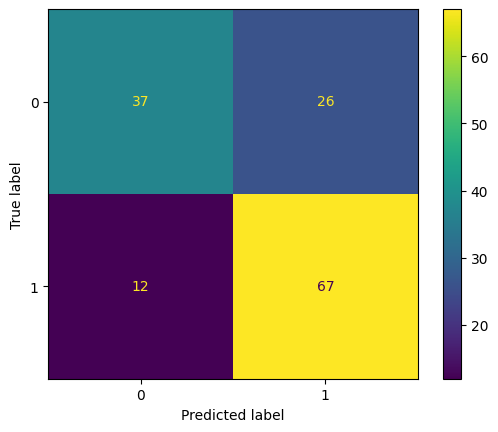

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
# disp = ConfusionMatrixDisplay(cm, display_labels=clf2.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
disp.plot()